In [1]:
# 매 강의 시작시마다 동일하게 처리해야 함
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:13pt;
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:15px;
</style>
"""))

<b><font size="5" color="red">ch10. N차원 배열 다루기</font></b>
# 4절. 복사와 뷰
## 4.1 할당

In [2]:
import numpy as np

In [5]:
# a = np.array([0,1,2,3,4,5])
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [7]:
b = a

In [8]:
# a와 b가 같은 객체냐?
a is b

True

In [9]:
b.shape = (2,3)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [10]:
a

array([[0, 1, 2],
       [3, 4, 5]])

## 4.2 뷰(View)
- 슬라이싱할 경우 자동 view가 생성

In [12]:
c = np.arange(12).reshape(2, -1)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [13]:
d = c.view() # c의 뷰를 생성 : 얕은 복사
d is c # C객체와 d객체가 같냐?

False

In [14]:
id(c), id(d)

(2475032098736, 2475032098832)

In [15]:
c == d # c와 d의 내용이 모두 같음

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [16]:
np.all(c == d)

True

In [22]:
d.shape = (3, 4)
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [23]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [25]:
d[0, 0::2] = -99
d

array([[-99,   1, -99,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

In [26]:
c

array([[-99,   1, -99,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

In [27]:
# 슬라이싱이 될 때 자동 뷰가 반환됨

c = np.arange(12).reshape(2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [28]:
d = c[:,:-1]
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

In [30]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

## 4.3 깊은 복사

In [31]:
c = np.arange(12).reshape(2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [33]:
d = c[:, :-1].copy() # 깊은 복사
d[..., -2] = 99
d

array([[ 0,  1,  2, 99,  4],
       [ 6,  7,  8, 99, 10]])

In [34]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

# 5절. 고급인덱싱
## 5.1 인덱스 배열로 인덱싱

In [36]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [51]:
a[ [0, 0, 1, 5] ]

array([ 0,  0,  1, 25])

In [40]:
# 인덱싱하기 위한 값을 배열로 만듦
i = np.array([0,0,1,5])
a[i]

array([ 0,  0,  1, 25])

In [41]:
# 인덱싱하기 위한 값을 배열로 반듬
j = np.array([[0,0],
            [1,5]])
a[j]

array([[ 0,  0],
       [ 1, 25]])

In [ ]:
# image_data = [[[255,255,255],
#                [255,255,255],
#                [255,255,255],
#                [0,0,0],
#               ],
#              ]

In [58]:
                   # R G B
palette = np.array([[0,0,0], # black
                   [255,0,0], # red
                   [0,255,0], # greeen
                   [0,0,255], # blue
                   [255,255,255]]) # white

In [62]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data = palette[[image_index]]

In [63]:
image_data.shape

(1, 10, 10, 3)

TypeError: Invalid shape (1, 10, 10, 3) for image data

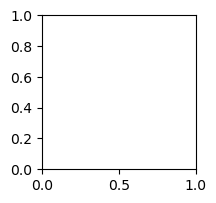

In [64]:
from matplotlib import pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(image_data)
plt.show()

## 5.2 논리 배열을 이용한 인덱싱

In [68]:
a = np.array([0,1,10,11,12,13,14,15,99])
a

array([ 0,  1, 10, 11, 12, 13, 14, 15, 99])

In [69]:
a%2==0

array([ True, False,  True, False,  True, False,  True, False, False])

In [71]:
a[a%2==0] #논리 배열을 이용한 인덱싱 시 True요소만 추출

array([ 0, 10, 12, 14])

In [72]:
# a배열에서 12보다 큰 값만 추출
a[a>12]

array([13, 14, 15, 99])

# 6절. 선형대수
- 2차원 넘파이 배열을 행령
    * 행렬 곱 : @, dot(), 단위행렬
    * 역행렬 : np.linalg.inv(행렬) : 역행렬@행렬 = 단위
    * 전치행렬 : 행렬.T / 행렬.transpose()

In [73]:
a = np.array([[1,2],
            [3,4]])
a # 정방행렬

array([[1, 2],
       [3, 4]])

In [75]:
# a의 역행렬 : a의 역행렬 @ a = a@a의 역행렬 => 단위행렬

np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

## 6.1 선형 연립 방정식 풀기(독립변수1, 데이터2)

In [83]:
x = np.array([2, 4]) # 독리변수
y = np.array([40, 60]) # 종속변수
X = np.dstack( (x, np.ones(len(x))))
X 

array([[[2., 1.],
        [4., 1.]]])

In [84]:
# x @ wb = Y
# X의 역행렬 @ X @ wb=X의 역행렬 @ Y
# wb = X의 역행렬 @ ㅛ
wb = np.linalg.inv(X) @ Y
wb

NameError: name 'Y' is not defined